In [1]:
import Parameteriser
from Simulator import SolutionSimulator

rdk_pmd = Parameteriser.SolutionParameteriser.via_rdkit("c1ccccc1")
rdk_pmd


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/parmed/structure.py:1775: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


<Structure 1497 atoms; 496 residues; 1002 bonds; PBC (orthogonal); parameterized>

In [2]:
import Parameteriser
from Simulator import SolutionSimulator
from rdkit import Chem
mol = Chem.MolFromSmiles("c1ccccc1")
from rdkit.Chem import rdDistGeom
rdDistGeom.EmbedMolecule(mol)
rdk_pmd = Parameteriser.SolutionParameteriser.via_rdkit(mol = mol)
rdk_pmd

[17:10:50] Molecule does not have explicit Hs. Consider calling AddHs()
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/parmed/structure.py:1775: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


<Structure 1500 atoms; 497 residues; 1004 bonds; PBC (orthogonal); parameterized>

In [1]:
import Parameteriser_constrained
from Simulator import SolutionSimulator

rdk_pmd_constrained = Parameteriser_constrained.SolutionParameteriser.via_rdkit("c1ccccc1")
rdk_pmd_constrained


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/parmed/structure.py:1775: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


<Structure 1494 atoms; 495 residues; 1000 bonds; PBC (orthogonal); parameterized>

In [3]:
from Simulator import SolutionSimulator
SolutionSimulator.via_openmm(rdk_pmd_constrained, file_name = "benzene_constrained", file_path = "./", 
                             platform = "CUDA", num_steps = 5000 * 500)

AttributeError: 'NoneType' object has no attribute 'req'

In [9]:
SolutionSimulator.via_openmm(rdk_pmd, file_name = "benzene", file_path = "./", 
                             platform = "CUDA", num_steps = 5000 * 500)

'/localhome/cschiebroek/MDFPs/mdfptools-1/examples/benzene.h5'

In [10]:
#First load in the simulated trajectory
import mdtraj as md
traj = md.load("./benzene.h5")

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [15]:
from Composer import SolutionComposer
mdfp = SolutionComposer.run(traj, rdk_pmd,smiles="c1ccccc1")

The returned object from a Composer is a `MDFP` object. As can be seen from above, it contains more information.
To use it for the subsequent machine learning tasks, call the `get_mdfp()` method to get the feature vectors (i.e. just the values not the keys)

In [27]:
print(mdfp.get_mdfp())

[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.449853464132135, 0.08582111145660468, 8.441295681995182, 22.377345228101785, 0.554998685766172, 22.257757119441322, -16.95474881151296, 9.940047292255558, -16.481335399377038, -15.582322274073302, 5.718904951407143, -16.232199446655756, 30.827198692233917, 0.5674452115357036, 30.698609726670785, -32.53707108558626, 9.473301252108618, -32.46123091060353, 0.15048547845062343, 7.22533132975676e-05, 0.1505005645108472, 2.4337163, 0.008083881, 2.4337869]


In [29]:
from openff.toolkit.utils import get_data_file_path
from openff.toolkit.topology import Molecule, Topology
from openff.toolkit.typing.engines.smirnoff import ForceField
import numpy as np
from simtk import unit
from openff.toolkit.typing.engines.smirnoff.parameters import LibraryChargeHandler
import parmed

sdf_filepath = get_data_file_path('systems/monomers/water.sdf')
molecule = Molecule(sdf_filepath)
molecule.partial_charges = np.asarray([-0.7850000262260437,0.39250001311302185,0.39250001311302185]) * unit.elementary_charge
library_charge_type = LibraryChargeHandler.LibraryChargeType.from_molecule(molecule)
forcefield = ForceField("openff_unconstrained-2.1.0.offxml")
forcefield["LibraryCharges"].add_parameter(parameter=library_charge_type)
topology = molecule.to_topology()
openmm_system = forcefield.create_openmm_system(topology, charge_from_molecules=[molecule])
structure =  parmed.openmm.topsystem.load_topology(topology.to_openmm(), openmm_system, [[1,0,0],[0,1,0],[0,0,1]])
structure.save("tip3p_updated_carl.prmtop")

AttributeError: 'NoneType' object has no attribute 'used'

In [35]:
smiles = 'c1ccccc1'
rdk_pmd = Parameteriser.SolutionParameteriser.via_rdkit(smiles)
rdk_pmd.
# ch = forcefield.get_parameter_handler('Constraints')
# ch.add_parameter({'smirks': '[#1:1]-[*:2]'})
# print(ch)

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/parmed/structure.py:1775: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


[(5, '?'), (7, 'R'), (10, 'R'), (12, 'S')]
1


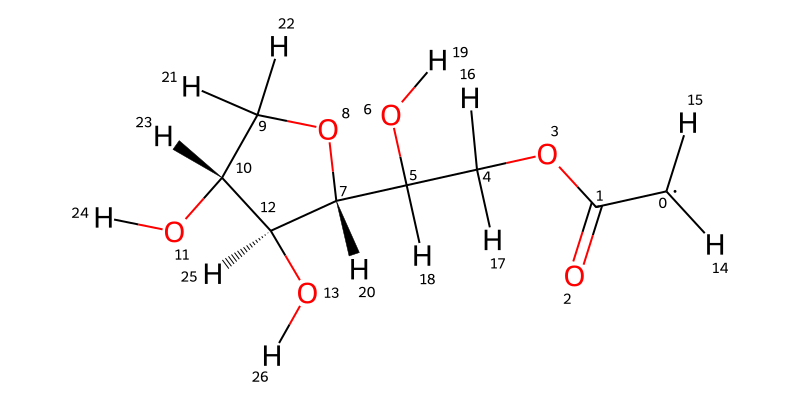

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.addHydrogens=True
IPythonConsole.molSize = (800,400)
#also show the hydrogens

mol = Chem.MolFromSmiles('[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]')
mol = Chem.MolFromSmiles('[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]')

print(Chem.FindMolChiralCenters(mol,force=True,includeUnassigned=True))
print(rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol))

Chem.AddHs(mol)

In [28]:
from rdkit.Chem import EnumerateStereoisomers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdDistGeom
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 0xf00d
mol = Chem.MolFromSmiles('[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]')
for m in (EnumerateStereoisomers.EnumerateStereoisomers(mol)):
    print('Smiles: ', Chem.MolToSmiles(m,isomericSmiles=True))
    print('Chiral centers: ' , Chem.FindMolChiralCenters(m,force=True,includeUnassigned=True))
    print('Undenifed Chiral centers: ', rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(m))
    mh = Chem.AddHs(m)
    if rdDistGeom.EmbedMolecule(mh,ps) == 0:
        print('Conformer generation successful')
    else:
        print('Conformer generation failed')
    print('')
    


Smiles:  CCCCCCCCCCCCCCCCCC(=O)OC[C@H](O)[C@H]1OC[C@@H](O)[C@@H]1O
Chiral centers:  [(21, 'S'), (23, 'R'), (26, 'R'), (28, 'S')]
Undenifed Chiral centers:  0
Conformer generation successful

Smiles:  CCCCCCCCCCCCCCCCCC(=O)OC[C@@H](O)[C@H]1OC[C@@H](O)[C@@H]1O
Chiral centers:  [(21, 'R'), (23, 'R'), (26, 'R'), (28, 'S')]
Undenifed Chiral centers:  0
Conformer generation successful



In [14]:
from rdkit import Chem
from rdkit.Chem import EnumerateStereoisomers

from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import rdkit
print(rdkit.__version__)
mol = Chem.MolFromSmiles('[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]')
mols_3d = []
for m in (EnumerateStereoisomers.EnumerateStereoisomers(mol)):
    mh = Chem.AddHs(m)
    ps = rdDistGeom.ETKDGv3()
    ps.randomSeed = 0xf00d
    print(rdDistGeom.EmbedMolecule(mh,ps))
    mols_3d.append(mh)


2023.03.3
0
0


In [20]:
mol = Chem.MolFromSmiles('[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[@OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]')


[14:56:58] SMILES Parse Error: syntax error while parsing: [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[@OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]
[14:56:58] SMILES Parse Error: Failed parsing SMILES '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[@OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]' for input: '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C](=[O])-[O]-[CH2]-[CH](-[@OH])-[C@H]1-[O]-[CH2]-[C@@H](-[OH])-[C@@H]-1-[OH]'


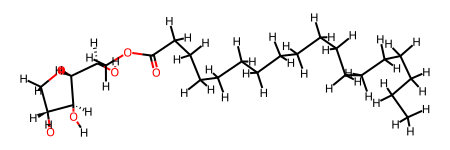

In [19]:
IPythonConsole.ipython_3d = False
len(mols_3d)
m1 = mols_3d[0]
m2 = mols_3d[1]
m2

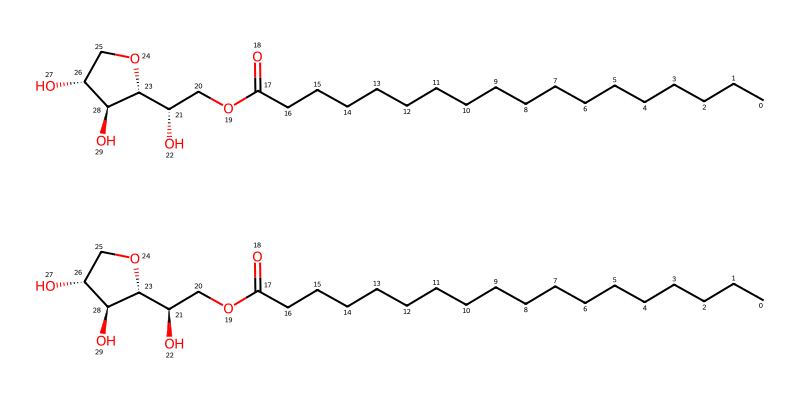

In [18]:
Draw.MolsToGridImage([m for m in (EnumerateStereoisomers.EnumerateStereoisomers(mol))],molsPerRow=1,subImgSize=(800,200))

None
1
None
1
[(5, '?'), (7, 'R'), (10, 'R'), (12, 'S')]


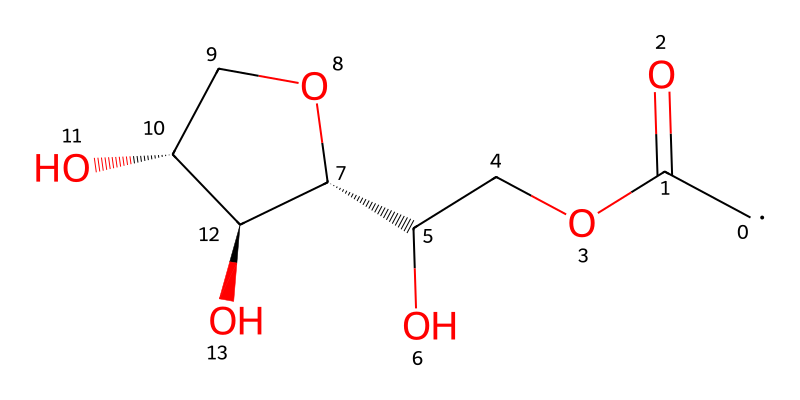

In [32]:
print(rdmolops.AssignStereochemistry(mol,force = True,flagPossibleStereoCenters = True,cleanIt = True))
print(rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol))
mol
rdmolops.SanitizeMol(mol)
print(rdmolops.AssignStereochemistry(mol,force = True,flagPossibleStereoCenters = True,cleanIt = True))
print(rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol))
print(Chem.FindMolChiralCenters(mol,force=True,includeUnassigned=True))

mol

In [9]:
from rdkit.Chem import rdmolops

print(rdmolops.AssignStereochemistry(mol,force = True,flagPossibleStereoCenters = True))
print(Chem.FindMolChiralCenters(mol,force=True,includeUnassigned=True))

None
[(21, '?'), (23, 'R'), (26, 'R'), (28, 'S')]


In [16]:
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters
CalcNumAtomStereoCenters(mol)

4

In [15]:
from openff.toolkit.topology import Molecule
molecule = Molecule.from_rdkit(mol, allow_undefined_stereo=False)

UndefinedStereochemistryError: Unable to make OFFMol from RDMol: RDMol has unspecified stereochemistry. Undefined chiral centers are:
 - Atom C (index 21)


In [41]:
import pandas as pd
df = pd.read_csv('../cleaned_vp_298.tsv', sep = "\s")
df.head()
smiles = df['SMILES'].tolist()
missing_stereo_counter = 0
sources = list(set(df['Source'].tolist()))
#create empty dict from sources
source_dict = {}
for source in sources:
    source_dict[source] = 0
for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    if mol is None:
        print(smile)
        continue
    if rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol) > 0:
        missing_stereo_counter += 1
    #add +1 to source
        source_dict[df.loc[df['SMILES'] == smile]['Source'].iloc[0]] += 1
print(missing_stereo_counter)

#print source dict
for source in source_dict:
    print(source, source_dict[source])

/tmp/ipykernel_27393/924499966.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../cleaned_vp_298.tsv', sep = "\s")


432
CRC;PUBCHEM;OCHEM;REACH 1
PUBCHEM;REACH 2
OCHEM 255
CRC;OCHEM 6
OCHEM;REACH 11
PUBCHEM;OCHEM;REACH 1
CRC;OCHEM;REACH 0
REACH 145
PUBCHEM 3
CRC 5
CRC;PUBCHEM;OCHEM 0
PUBCHEM;OCHEM 3


In [33]:
df.head()

,hash_code,SMILES,Temperature,Vapour,Pressure,(log10,kPa),Source
0,000c0dc393452e54c19cae2c6501b956,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-14.744727,REACH,NaN,NaN,NaN
1,000fc88939f1aea674885bb0d93a2e8d,[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[NH2]):[cH]:[cH]:1,293.15,-2.397977,OCHEM,NaN,NaN,NaN
2,0026cd05c00286506e4c0051abcde83f,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,298.15,-0.301067,PUBCHEM,NaN,NaN,NaN
3,0029fb907f0382cb8ba7913301e791ec,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,298.15,-6.053323,OCHEM,NaN,NaN,NaN
4,0050ebd8f62aa0dd9dd972b02e277f5b,[Cl]-[CH2]-[O]-[CH2]-[Cl],298.15,0.591625,OCHEM,NaN,NaN,NaN


In [46]:
df_sampl6 = pd.read_csv("/localhome/cschiebroek/ShuZe/SAMPL6_logP/data/for_euler/out_exp.tsv", sep = '\t')
df_sampl6 = df_sampl6.drop_duplicates("hash_code") 
print(len(df_sampl6))
df_sampl6.head()

3956


,Unnamed: 0,canonical_smiles,old_hash_code,hash_code,notes,kek_canonical_smiles,dG_chloroform,source_chloroform,dG_cyclohexane,source_cyclohex,...,source_fs,logK_fat,dG_fat,source_fat,logK_hexadecane,dG_hexadecane_converted,source_hexadec_conv,logP_octanol_water,source_logP_ow,chemical_name
0,0,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH3],ca2dd43f910e90a5f43d7ac3bae7af48,ca2dd43f910e90a5f43d7ac3bae7af48,NaN,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH3],-21.96600,minnesota,-23.55592,minnesota,...,freeSolv,2.99,-17.73,Helmholtz_Goss,3.677,-20.97778,Helmholtz_Goss,5.18,ncidb,"{'Octane', 'n-Octane', ' octane'}"
1,1,[CH2]1-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-1,b07da563fbe1f7e095b706ab32633834,b07da563fbe1f7e095b706ab32633834,NaN,[CH2]1-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-1,-18.61880,minnesota,-18.53512,minnesota,...,freeSolv,2.51,-14.90,Helmholtz_Goss,2.964,-16.91002,Helmholtz_Goss,3.44,ncidb,"{' cyclohexane', 'Cyclohexane'}"
2,2,[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1,f9b8d855deb985e47e844a9e7519b7f7,60c5fa2eb3046aca250f27ede97fbe7a,NaN,[CH]1:[CH]:[CH]:[CH]:[CH]:[CH]:1,-19.41376,minnesota,-17.53096,minnesota,...,freeSolv,2.69,-15.94,Helmholtz_Goss,2.786,-15.89451,Helmholtz_Goss,2.13,ncidb,"{' benzene', 'Benzene'}"
3,3,[CH3]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1,4bbf4165fcea4559a18a87af9e599093,eeda4e5e21155097c7c42d1c9451dc3f,NaN,[CH3]-[C]1:[CH]:[CH]:[CH]:[CH]:[CH]:1,-22.92832,minnesota,-20.50160,minnesota,...,freeSolv,3.09,-18.33,Helmholtz_Goss,3.325,-18.96958,Helmholtz_Goss,2.73,ncidb,"{'Toluene', ' toluene'}"
4,4,[CH3]-[CH2]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1,7b59ab62af1b8d2ebebd0b105681e46b,3afe1a650d42e0da0d4ebab1678da313,NaN,[CH3]-[CH2]-[C]1:[CH]:[CH]:[CH]:[CH]:[CH]:1,-24.43456,minnesota,-20.79448,minnesota,...,freeSolv,3.48,-20.63,Helmholtz_Goss,3.778,-21.55400,Helmholtz_Goss,3.15,ncidb,"{' ethylbenzene', 'Ethylbenzene'}"


In [47]:
hash_vp = df['hash_code'].tolist()
hash_sampl6 = df_sampl6['hash_code'].tolist()
#check overlap
shared_hash = list(set(hash_vp).intersection(hash_sampl6))
print(len(shared_hash))

1128


In [60]:
df_sampl6.head()
#print columns
for col in df_sampl6.columns:
    print(col)
print(df_sampl6.head(1))

Unnamed: 0
canonical_smiles
old_hash_code
hash_code
notes
kek_canonical_smiles
dG_chloroform
source_chloroform
dG_cyclohexane
source_cyclohex
dG_octanol
source_octanol
dG_hexadecane
source_hexadec
dG_water
source_fs
logK_fat
dG_fat
source_fat
logK_hexadecane
dG_hexadecane_converted
source_hexadec_conv
logP_octanol_water
source_logP_ow
chemical_name
   Unnamed: 0                                 canonical_smiles  \
0           0  [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH3]   

                      old_hash_code                         hash_code  notes  \
0  ca2dd43f910e90a5f43d7ac3bae7af48  ca2dd43f910e90a5f43d7ac3bae7af48    NaN   

                              kek_canonical_smiles  dG_chloroform  \
0  [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH3]        -21.966   

  source_chloroform  dG_cyclohexane source_cyclohex  ...  source_fs logK_fat  \
0         minnesota       -23.55592       minnesota  ...   freeSolv     2.99   

   dG_fat      source_fat  logK_hexadecane dG_hexadecan

In [58]:
#show example overlap: first hash, get smiles
print(df_sampl6.loc[df_sampl6['hash_code'] == shared_hash[0]]['canonical_smiles'].iloc[0])
print(df.loc[df['hash_code'] == shared_hash[0]]['SMILES'].iloc[0])
#sanity check: check for all hashes if smiles are the same
for hash in shared_hash:
    if df_sampl6.loc[df_sampl6['hash_code'] == hash]['canonical_smiles'].iloc[0] != df.loc[df['hash_code'] == hash]['SMILES'].iloc[0]:
        print("Error")
        break

#cool! seems to work. So print out lenght of both datasets and overlap
print(len(df))
print(len(df_sampl6))
print(len(shared_hash))

#for smiles in df with shared hash, check if missing stereo
missing_stereo_counter = 0
for hash in shared_hash:
    smile = df.loc[df['hash_code'] == hash]['SMILES'].iloc[0]
    mol = Chem.MolFromSmiles(smile)
    if mol is None:
        print(smile)
        continue
    if rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(mol) > 0:
        missing_stereo_counter += 1
print('Missing stereo in overlapping mols: ', missing_stereo_counter)


[CH3]-[O]-[C](=[O])-[CH2]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1
[CH3]-[O]-[C](=[O])-[CH2]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1
3098
3956
1128
Missing stereo in overlapping mols:  93


In [42]:
len(df)

3098